In [1]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam
from keras import regularizers

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

import numpy as np
import scipy.misc
from keras.models import load_model

Using TensorFlow backend.


In [2]:
def generate_line_patch(label):
    patch = np.zeros((3,3))
    if label == 0:
        patch[:,1] = 1
    else:
        patch[1,:] = 1
        
    return patch

In [3]:
# generate training data

def generate_data(n_samples):
    data_x = []
    data_y = []
    for i in range(n_samples):
        y = (np.random.random(1)>0.5) * 1.0
        x = generate_line_patch(y)
        
        data_x.append(x.flatten())
        data_y.append(y)
        
    data_x = np.array(data_x)
    data_y = np.array(data_y)
    
    return data_x, data_y

In [4]:
data_x_train, data_y_train = generate_data(100)
data_x_test, data_y_test = generate_data(100)

In [5]:
model = Sequential()
model.add(Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(9,)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                100       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________


In [6]:
adam = Adam(lr=0.01)
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [7]:
history = model.fit(data_x_train, data_y_train,
                    batch_size=10,
                    epochs=50,
                    verbose=1,
                    validation_data=(data_x_test, data_y_test))

Train on 100 samples, validate on 100 samples
Epoch 1/50
100/100 [==============================] - 0s - loss: 0.5020 - acc: 0.8200 - val_loss: 0.3601 - val_acc: 1.0000
Epoch 2/50
100/100 [==============================] - 0s - loss: 0.2894 - acc: 1.0000 - val_loss: 0.2067 - val_acc: 1.0000
Epoch 3/50
100/100 [==============================] - 0s - loss: 0.1645 - acc: 1.0000 - val_loss: 0.1154 - val_acc: 1.0000
Epoch 4/50
100/100 [==============================] - 0s - loss: 0.0924 - acc: 1.0000 - val_loss: 0.0690 - val_acc: 1.0000
Epoch 5/50
100/100 [==============================] - 0s - loss: 0.0571 - acc: 1.0000 - val_loss: 0.0452 - val_acc: 1.0000
Epoch 6/50
100/100 [==============================] - 0s - loss: 0.0384 - acc: 1.0000 - val_loss: 0.0307 - val_acc: 1.0000
Epoch 7/50
100/100 [==============================] - 0s - loss: 0.0265 - acc: 1.0000 - val_loss: 0.0220 - val_acc: 1.0000
Epoch 8/50
100/100 [==============================] - 0s - loss: 0.0194 - acc: 1.0000 - val_l

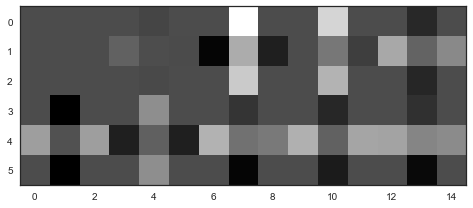

In [8]:
layer = model.layers[0]
weights = layer.get_weights()

filterTiles = np.array([])
index = 0
for i in range(5):
    filterRow = []
    for j in range(2):
        w = weights[0][:,index]
        w = w.reshape(3,3)
        filterRow.extend(w)
        index+=1
    filterRow = np.array(filterRow)
    if not filterTiles.shape[0] == 0:
        filterTiles = np.hstack([filterTiles, filterRow])
    else:
        filterTiles = filterRow

plt.imshow(filterTiles, cmap='gray')    
plt.show()


In [9]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('my_model.h5')